<a href="https://colab.research.google.com/github/Umeshmanchikanti/Crop_Production_Insights/blob/main/Crop_Production_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Crop Production data.csv")
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [ ]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [ ]:
100*df.isnull().mean()

State_Name       0.000000
District_Name    0.000000
Crop_Year        0.000000
Season           0.000000
Crop             0.000000
Area             0.000000
Production       1.515699
dtype: float64

In [ ]:
df.drop("Production",axis=1)

,State_Name,District_Name,Crop_Year,Season,Crop,Area
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0
...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0


In [ ]:
Top_States=df.groupby('State_Name')['Area'].sum().sort_values(ascending=False).astype(int).head(15)
print(Top_States)

State_Name
Uttar Pradesh     433631630
Madhya Pradesh    329813136
Maharashtra       322206237
Rajasthan         272024905
West Bengal       215405247
Karnataka         202910123
Gujarat           154944024
Andhra Pradesh    131545844
Bihar             128272031
Punjab            126725586
Odisha            110533616
Tamil Nadu         95897867
Haryana            89597306
Chhattisgarh       83039664
Telangana          81360624
Name: Area, dtype: int64


<ipython-input-11-5b461d28bcb1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Top_States.values, y=Top_States.index, palette='Dark2')


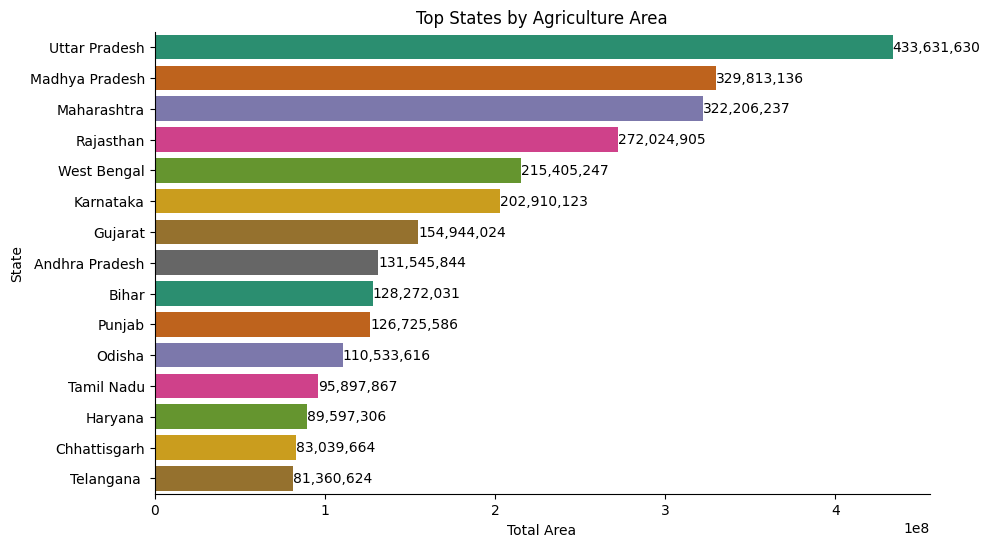

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=Top_States.values, y=Top_States.index, palette='Dark2')
for index, value in enumerate(Top_States):
    plt.text(value, index, f'{value:,}', va='center', ha='left')
plt.xlabel('Total Area')
plt.ylabel('State')
plt.title('Top States by Agriculture Area')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

In [ ]:
df.District_Name.nunique()

646

In [ ]:
df.District_Name.value_counts()

District_Name
BIJAPUR      945
TUMKUR       936
BELGAUM      925
HASSAN       895
BELLARY      887
            ... 
HYDERABAD      8
KHUNTI         6
RAMGARH        6
NAMSAI         1
MUMBAI         1
Name: count, Length: 646, dtype: int64

In [ ]:
df.Crop_Year.value_counts()

Crop_Year
2003    17287
2002    16671
2008    14550
2007    14526
2006    14328
2004    14117
2009    14116
2011    14071
2010    14065
2005    13799
2000    13658
2013    13650
2012    13410
2001    13361
1999    12515
1998    11533
2014    10973
1997     8899
2015      562
Name: count, dtype: int64

In [ ]:
df.Crop_Year.nunique()

19

In [ ]:
df.Season.nunique()

6

In [ ]:
season_counts=df.Season.value_counts()
print(season_counts)

Season
Kharif         95951
Rabi           66987
Whole Year     57305
Summer         14841
Winter          6058
Autumn          4949
Name: count, dtype: int64


<ipython-input-18-7e2f96dfbea9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_counts.values, y=season_counts.index, palette='Dark2')


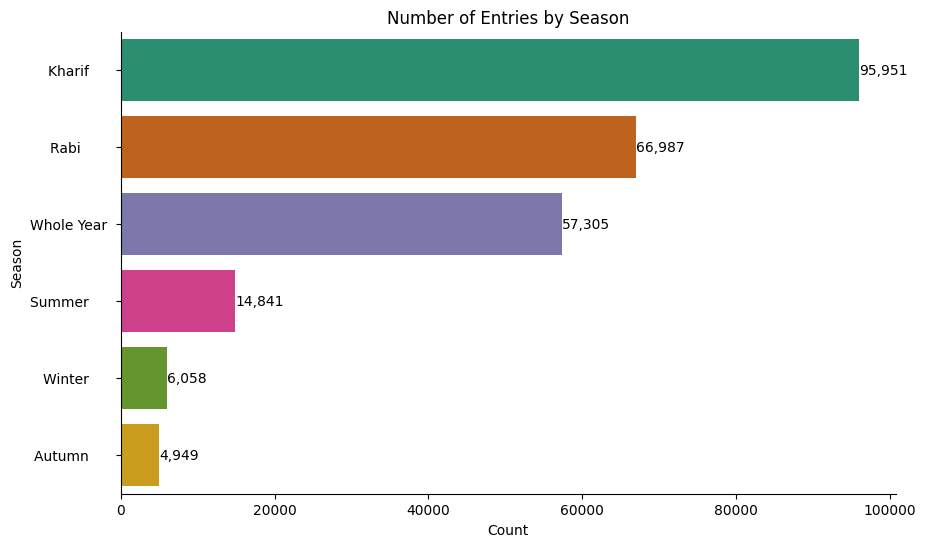

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=season_counts.values, y=season_counts.index, palette='Dark2')
for index, value in enumerate(season_counts):
    plt.text(value, index, f'{value:,}', va='center', ha='left')
plt.xlabel('Count')
plt.ylabel('Season')
plt.title('Number of Entries by Season')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

In [ ]:
df.Crop.nunique()

124

In [ ]:
df.Crop.value_counts()

Crop
Rice                 15104
Maize                13947
Moong(Green Gram)    10318
Urad                  9850
Sesamum               9046
                     ...  
Litchi                   6
Coffee                   6
Apple                    4
Peach                    4
Other Dry Fruit          1
Name: count, Length: 124, dtype: int64

<Axes: xlabel='Production', ylabel='State_Name'>

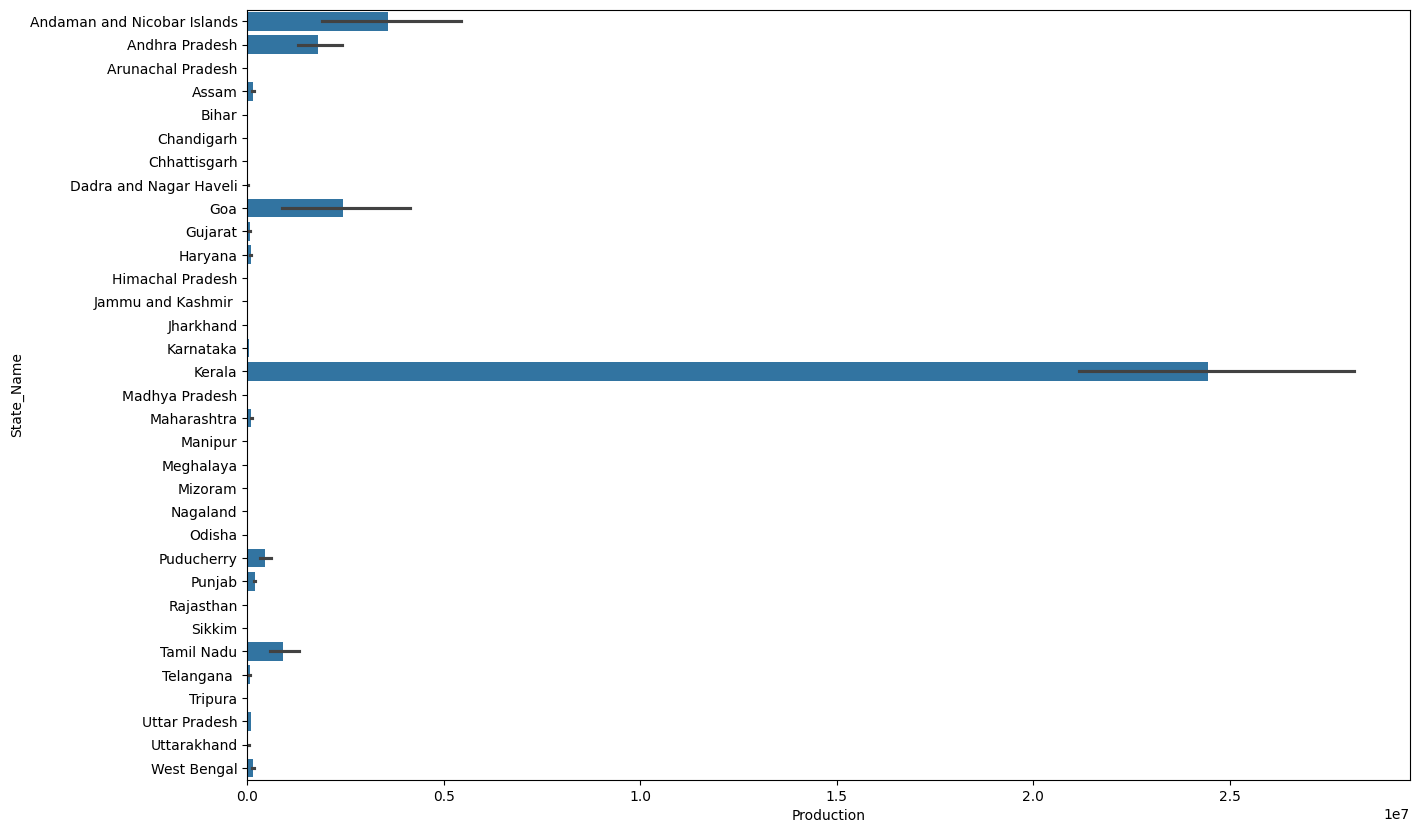

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=df["Production"], y=df["State_Name"])

<Axes: xlabel='Production', ylabel='Season'>

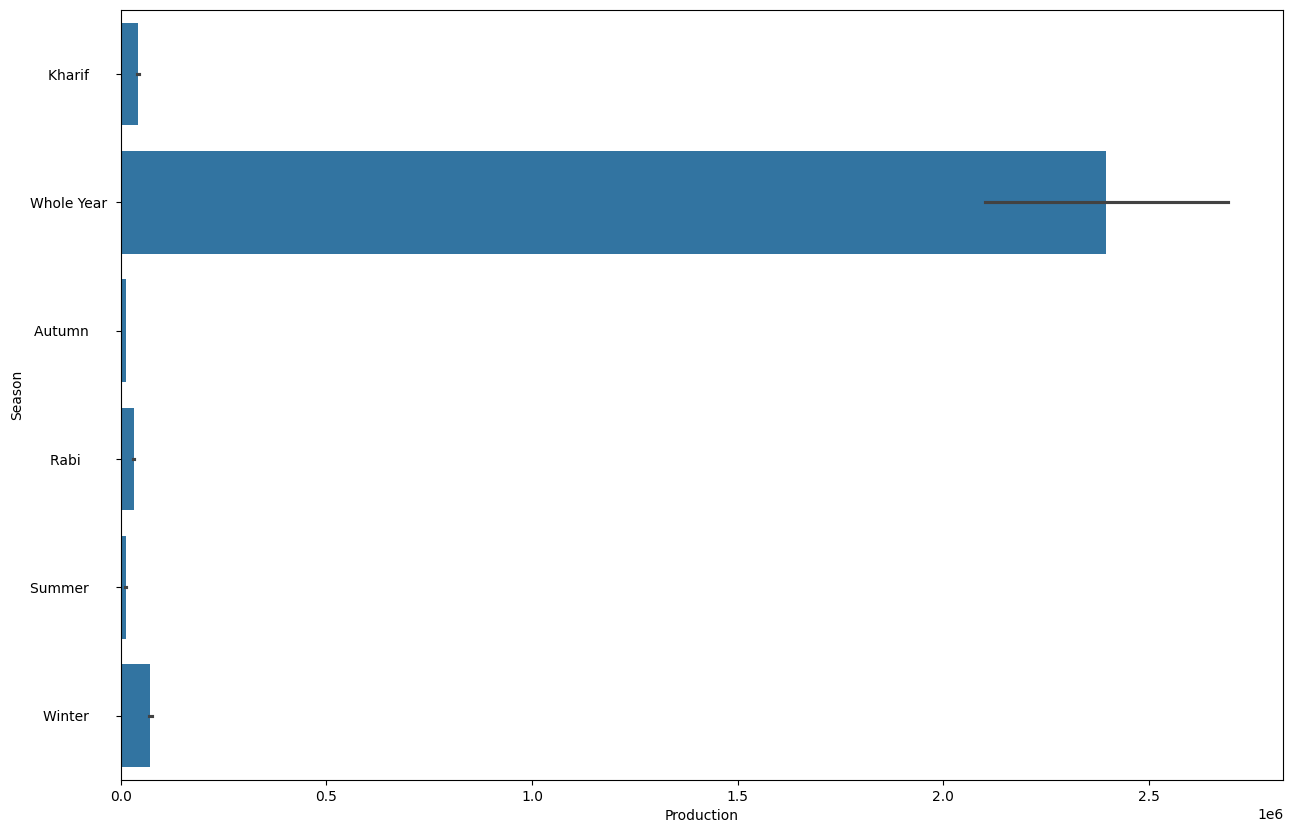

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=df["Production"], y=df["Season"])

In [ ]:
North = ['Jammu and Kashmir', 'Punjab', 'Himachal Pradesh', 'Haryana', 'Uttarakhand', 'Uttar Pradesh', 'Chandigarh']
East = ['Bihar', 'Odisha', 'Jharkhand', 'West Bengal']
South = ['Andhra Pradesh', 'Karnataka', 'Kerala', 'Tamil Nadu','Telangana']
West = ['Rajasthan', 'Gujarat', 'Goa', 'Maharashtra']
Central_India = ['Madhya Pradesh', 'Chhattisgarh']
North_East=['Assam', 'Sikkim', 'Nagaland', 'Meghalaya', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh']
Union_Territories = ['Andaman and Nicobar Islands', 'Dadra and Nagar Haveli', 'Puducherry']
def zones_names (row):
    if row['State_Name'].strip() in North:
        val= 'North Zone'
    elif row['State_Name'].strip() in South:
        val= 'South Zone'
    elif row['State_Name'].strip() in East:
        val= 'East Zone'
    elif row['State_Name'].strip() in West:
        val= 'West Zone'
    elif row['State_Name'].strip() in Central_India:
        val= 'Central Zone'
    elif row['State_Name'].strip() in North_East:
        val= 'NorthEast Zone'
    elif row['State_Name'].strip() in Union_Territories:
        val= 'Union Territory'
    else:
        val = 'No Value'
    return val

In [ ]:
df.Zones.value_counts()

Zones
South Zone         54207
North Zone         51468
East Zone          43339
West Zone          33786
Central Zone       33652
NorthEast Zone     28297
Union Territory     1342
Name: count, dtype: int64

In [ ]:
crop=df['Crop']
def categ_crop(crop):
    for i in ['Rice', 'Maize', 'Wheat', 'Barley', 'Varagu', 'Other Cereals & Millets', 'Ragi, Small millets', 'Bajra',
              'Jowar', 'Paddy', 'Total foodgrain', 'Jobster']:
        if crop==1:
            return 'Cereal'
    for i in ['Moong', 'Urad', 'Arhar/Tur', 'Peas & beans', 'Masoor', 'Other Kharif pulses', 'other misc.pulses',
              'Ricebean', 'Rajmash (nagadal)','Kholar', 'Lentil', 'Samai', 'Blackgram', 'Korra', 'Cowpea (Lobia)',
              'Other Rabi pulses', 'Other Kharif pulses', 'Peas & beans (Pulses)', 'Pulses total', 'Gram']:
        if crop==1:
            return 'Pulses'
    for i in ['Peach', 'Apple', 'Litchi', 'Pear', 'Plums', 'Ber', 'Sapota', 'Lemon', 'PomeGranet',
              'Other Citrus Fruit', 'Water Melon', 'JackFruit', 'Grapes', 'Pineapple', 'Orange',
              'Pome FruitCitrus Fruit', 'Other FreshFruits', 'Mango', 'Papaya', 'Coconut', 'Banana']:
        if crop==1:
            return 'Fruits'
    for i in ['Bean', 'Lab-Lab', 'Moth', 'Guar seed', 'Soyabean', 'Horse- gram']:
        if crop==1:
            return 'Beans'
    for i in ['Turnip', 'Peas', 'Beet Root', 'Carrot', 'Yam', 'Ribed Guard', 'Ash Gourd',
          'PumpKin', 'Redish', 'Snak Guard', 'Bottle Gourd', 'Bitter Gourd', 'Cucumber', 'Drum Stick',
          'Cauliflower', 'Beans & Mutter (Vegetable)', 'Cabbage', 'Bhindi', 'Tomato', 'Brinjal', 'Khesari',
          'Sweet potato', 'Potato', 'Onion', 'Tapioca', 'Colocosia']:
        if crop==1:
            return 'Vegetables'
    for i in ['Perilla', 'Ginger', 'Cardamom', 'Black pepper', 'Dry ginger, Garlic',
          'Coriander', 'Turmeric', 'Dry chillies', 'Cond-spcs other']:
        if crop==1:
            return 'spices'
    for i in ['other fibres', 'Kapas', 'Jute & mesta', 'Jute', 'Mesta', 'Cotton (lint)', 'Sannhamp']:
        if crop==1:
            return 'fibres'
    for i in ['Arcanut (Processed)', 'Atcanut (Raw)', 'Cashewnut Processed', 'Cashewnut Raw', 'Cashewnut', 'Arecanut', 'Groundnut']:
        if crop==1:
            return 'Nuts'
    for i in ['other oilseeds', 'Safflower', 'Niger seed', 'Castor seed', 'Linseed',
          'Sunflower', 'Rapeseed &Mustard', 'Sesamum', 'Oilseeds total']:
        if crop==1:
            return 'oilseeds'
    for i in ['Tobacco', 'Coffee', 'Tea', 'Sugarcane', 'Rubber']:
        if crop==1:
            return 'Commercial'

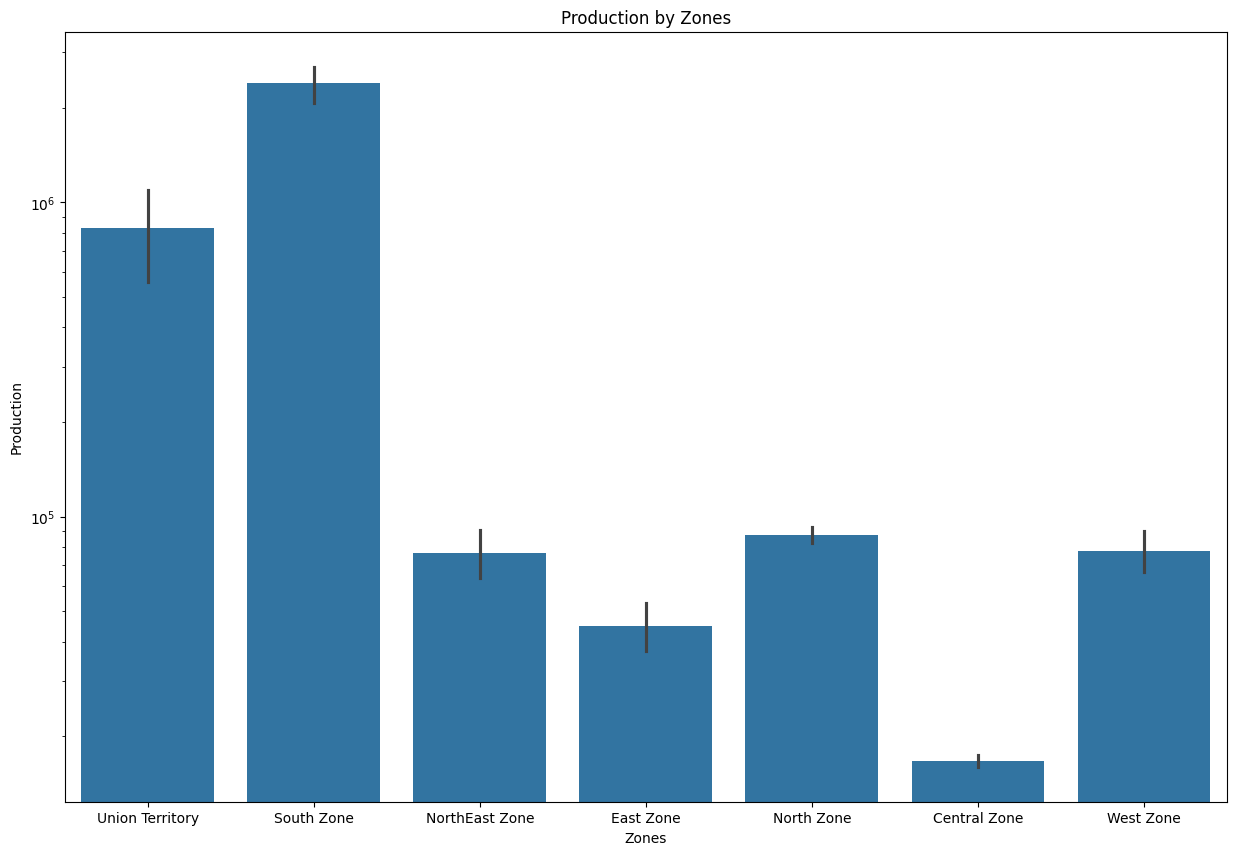

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=df.Zones, y=df.Production)
plt.yscale('log')
plt.title('Production by Zones')
plt.show()

Text(0.5, 1.0, 'South Zone Production')

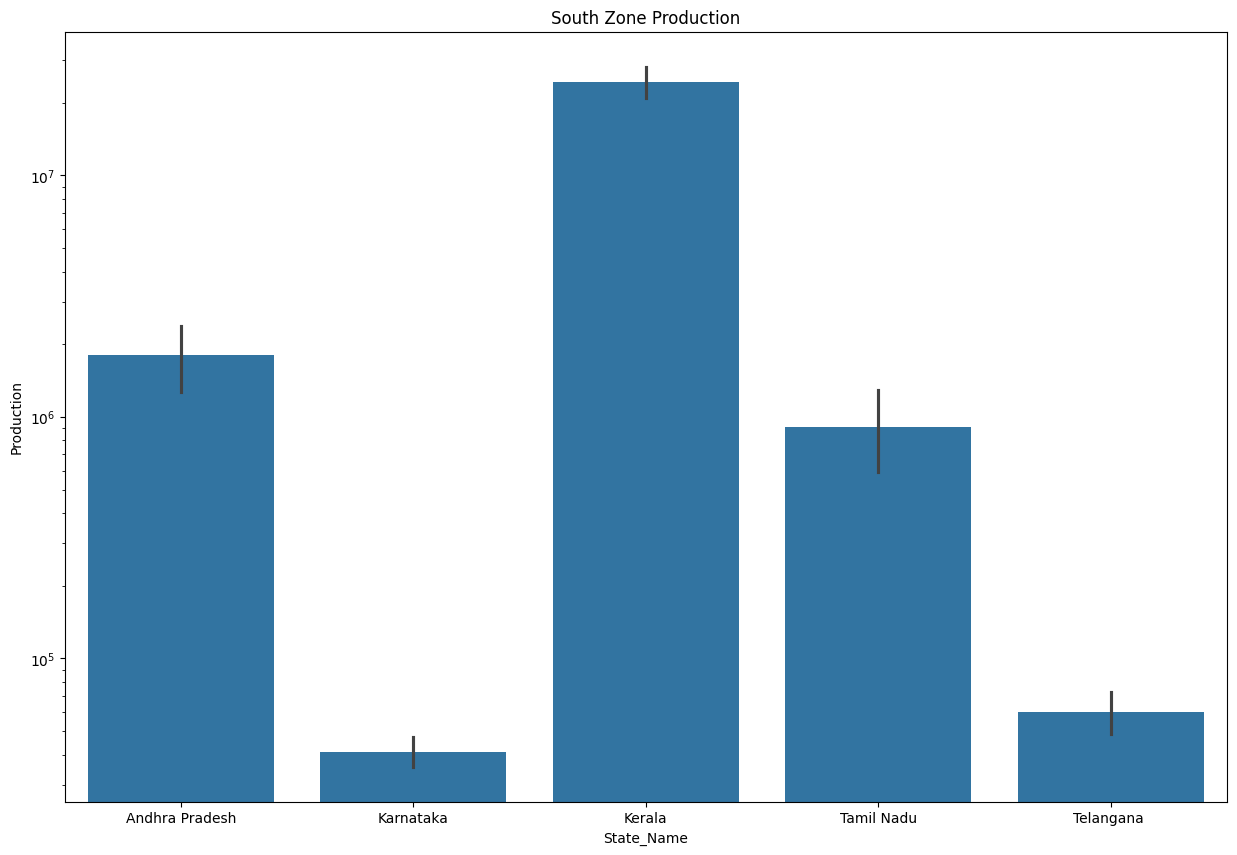

In [ ]:
Southern_part=df[(df [ "Zones"]=="South Zone")]
plt.figure(figsize=(15,10))
sns.barplot (x=Southern_part.State_Name,y=Southern_part. Production)
plt.yscale('log')
plt.title("South Zone Production")

Text(0.5, 1.0, 'UT Zone Production')

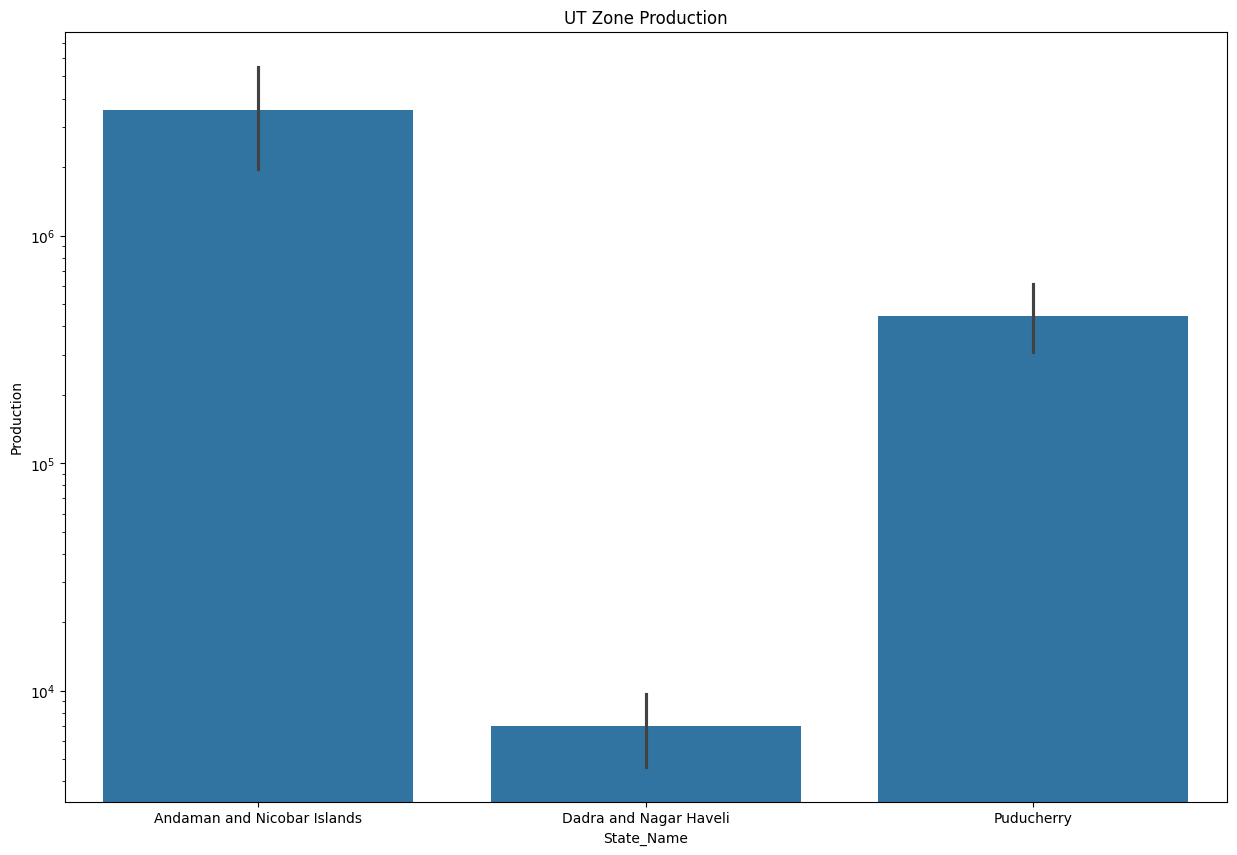

In [ ]:
UT_part=df[(df [ "Zones"]=="Union Territory")]
plt.figure(figsize=(15,10))
sns.barplot (x=UT_part.State_Name,y=UT_part.Production)
plt.yscale('log')
plt.title("UT Zone Production")

Text(0.5, 1.0, 'North Zone Production')

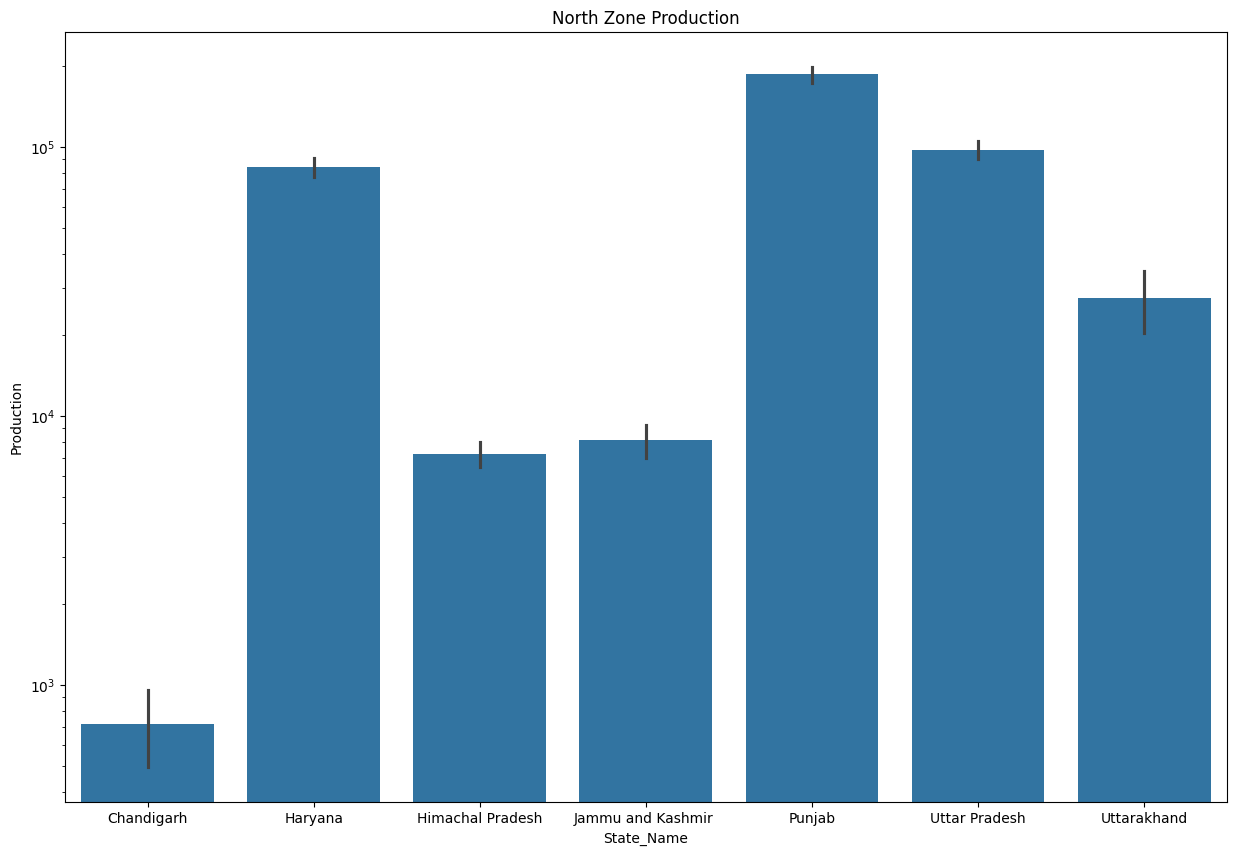

In [ ]:
Northern_part=df[(df [ "Zones"]=="North Zone")]
plt.figure(figsize=(15,10))
sns.barplot (x=Northern_part.State_Name,y=Northern_part. Production)
plt.yscale('log')
plt.title("North Zone Production")

Text(0.5, 1.0, 'Overall Crops vs Production')

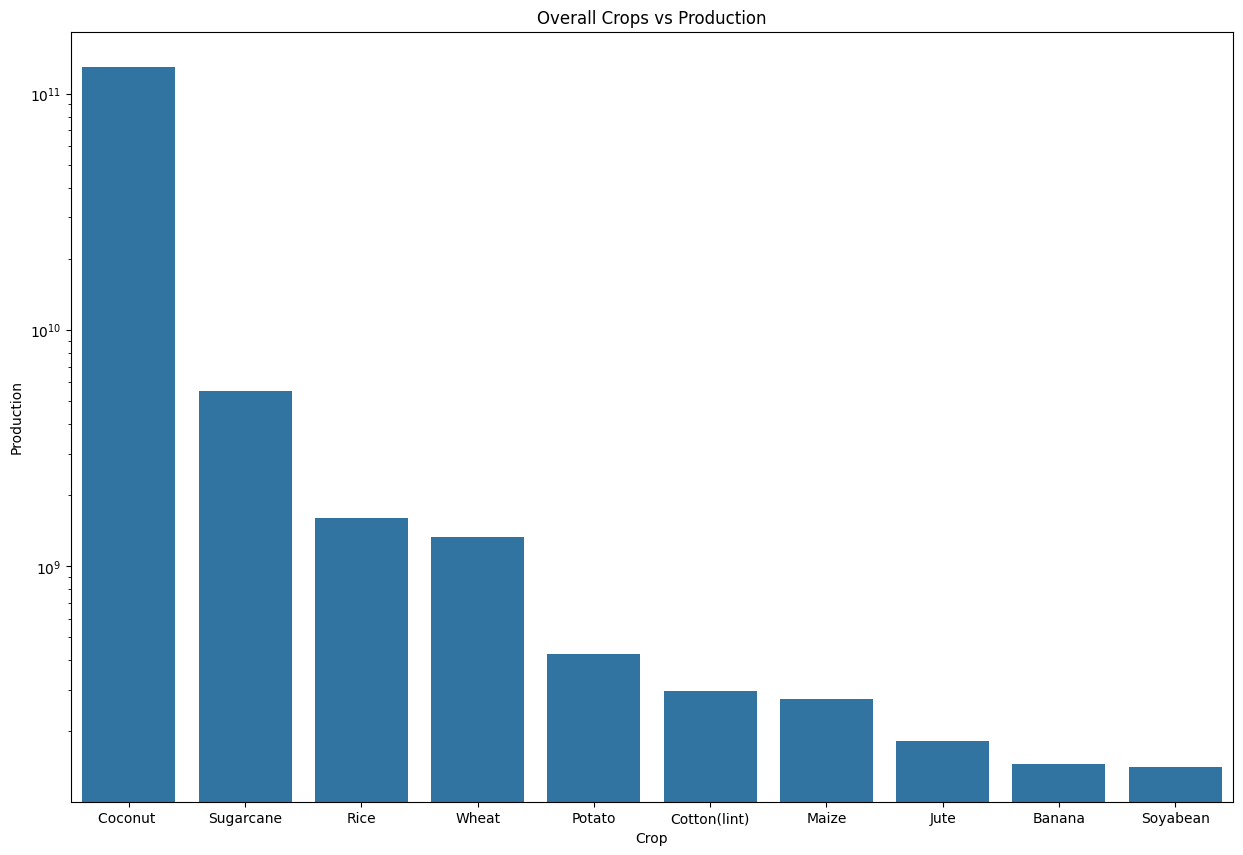

In [ ]:
crop= df.groupby(by='Crop')['Production'].sum().reset_index().sort_values (by='Production',ascending=False).head (10)
crop
fig, ax = plt.subplots (figsize=(15,10))
sns.barplot(x=crop.Crop, y=crop. Production)
plt.yscale('log')
plt.title('Overall Crops vs Production')

Text(0.5, 1.0, 'Overall Crops vs Production')

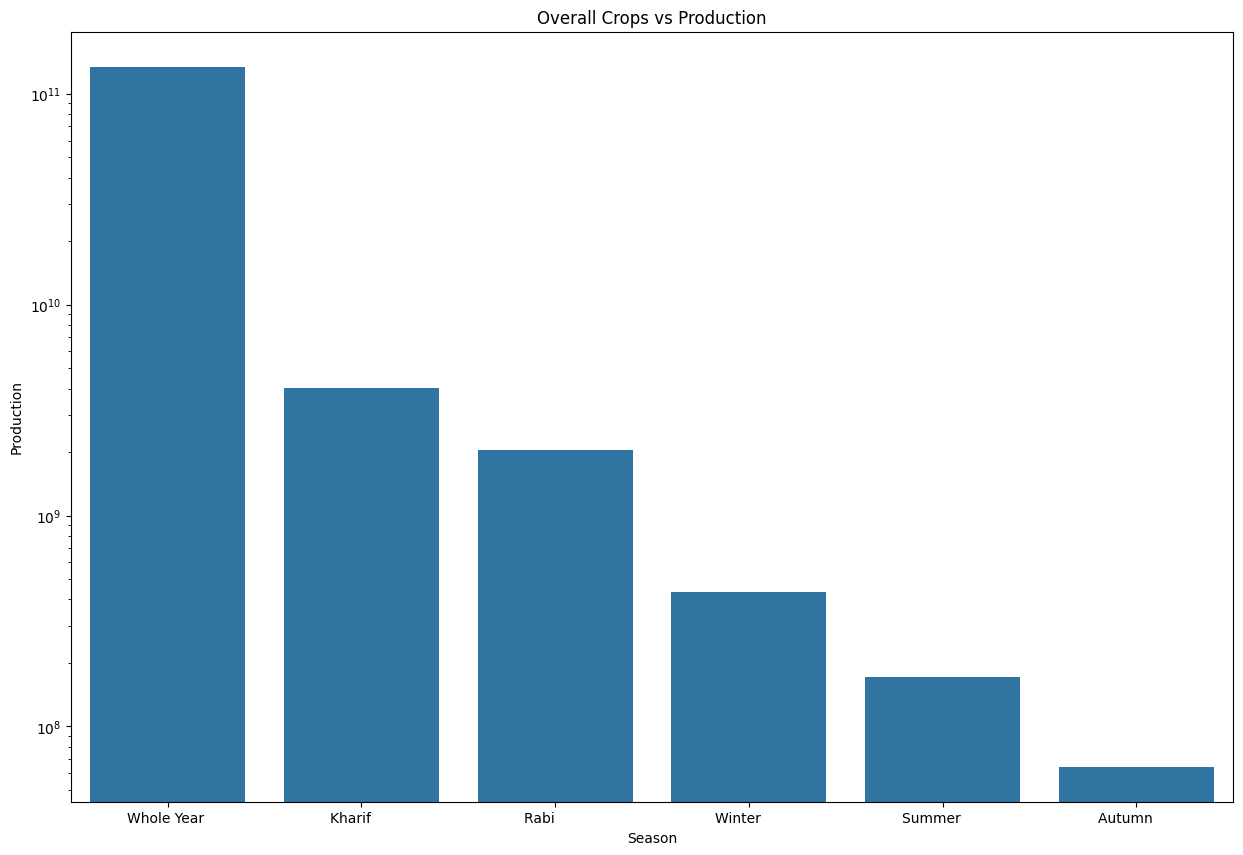

In [ ]:
season= df.groupby(by='Season')['Production'].sum().reset_index().sort_values (by='Production',ascending=False).head (10)
season
fig, ax = plt.subplots (figsize=(15,10))
sns.barplot (x=season. Season, y=season. Production)
plt.yscale('log')
plt.title( 'Overall Crops vs Production')